# **Curva de Phillips**
La Curva de Phillips se refiere a un modelo empírico de corto plazo en la economía que representa una relación inversa entre la inflación y el desempleo, variables macroeconómicas fundamentales. Según este modelo, cuando los policy makers implementan cambios en la economía, estas dos variables tienden a moverse en direcciones opuestas, lo que sugiere una disyuntiva entre reducir la inflación y reducir el desempleo.(Mankiw, 2008)

La ecuación principal de este modelo es la siguiente:

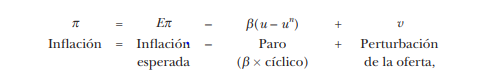

Fuente: Macroeconomía, Mankiw

In [ ]:
class CurvaPhillips:  # Aqui estamos definiendo la clase que va a ser la curva de phillips, la cual mas adelante tendra sus atributos, los cuales serán los valores que corresponden a la ecuación
    def __init__(self, inflacion_esperada, nairu,beta): # Aqui se definen los atributos del modelo y para ellos antes usamos el metodo init, el cual se usa para inicializar los atributos del objeto
      self.inflacion_esperada = inflacion_esperada
      self.nairu = nairu
      self.beta = beta
    def calculo_inflacion(self, desempleo, choque = 0):  # Ahora necesitamos hacer el calculo de la inflación, al cuál le definiremos los atributos de desempleo y choque, que en este caso va a ser de 0 por efectos de simplicidad del modelo
      inflacion = self.inflacion_esperada - self.beta * (desempleo - self.nairu) + choque # Aqui definimos la ecuación de la inflación según la ecuación de la curva de phillips
      if desempleo < 0: # If para confirmar que el modelo sea correcto
            raise ValueError("La tasa de desempleo no puede ser negativa.")
      return inflacion
    def valores_grafica(self, valores_desempleo1): # En esta parte para efectos de que nos muestre valores de desempleo por cada inflacion dada, usaremos el metodo de valores de grafica y le daremos el atributo de valores de desempleo
      valores_inflacion1 = []  # Definimos una caja donde se agreguen los valores de inflación en bucle
      for tasa in valores_desempleo1:   # Por cada tasa de desempleo dentro de los valores de desempleo dentro de la lista queremos que nos de un valor de inflación.
        inflacion = self.calculo_inflacion(desempleo = tasa)
        valores_inflacion1.append(inflacion)
      return valores_inflacion1

In [ ]:
curva1 = CurvaPhillips(inflacion_esperada=2,nairu=3,beta=0.5)  # Ahora definimos la curva 1, llamamos el metedo de la curva de phillips y le damos los valores a sus atributos, para luego usar el metodo calculo_inf
Inflacion1 = curva1.calculo_inflacion(desempleo = 5)
print(f"La inflación calculada es de {Inflacion1:.2f}%.")

La inflación calculada es de 1.00%.


In [ ]:
valores_desempleo1 = [2.5,3.0,3.5,4.0,4.5,5.0]  # Realizamos una lista de los valores de desempleo para realizar el calculo del modelo en ciertos periodos.
inflaciones = curva1.valores_grafica(valores_desempleo1)
print(f"Las inflaciones calculadas (%) para 6 periodos de tiempo es de: {inflaciones}.")

Las inflaciones calculadas (%) para 6 periodos de tiempo es de: [2.25, 2.0, 1.75, 1.5, 1.25, 1.0].


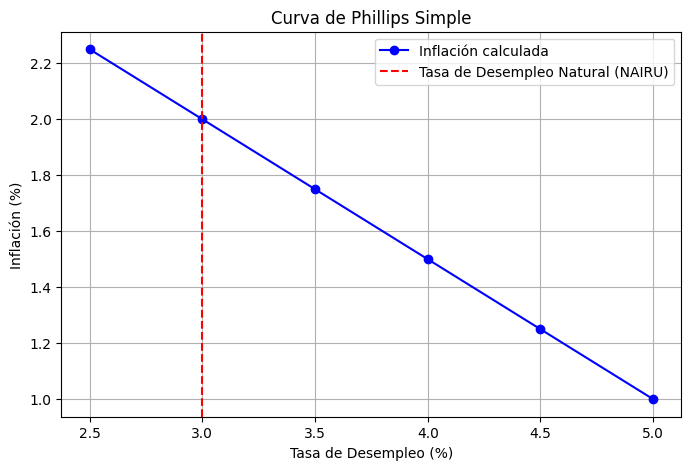

In [ ]:
import matplotlib.pyplot as plt  # importamos matplotlib.pyplot la cual es una biblioteca para crear gráficos en Python y realizamos la gráfica del modelo con nuestros datos.
plt.figure(figsize=(8, 5))
plt.plot(valores_desempleo1,inflaciones, marker='o', linestyle='-', color='b', label='Inflación calculada')
plt.axvline(curva1.nairu, color='r', linestyle='--', label='Tasa de Desempleo Natural (NAIRU)')
plt.xlabel('Tasa de Desempleo (%)')
plt.ylabel('Inflación (%)')
plt.title('Curva de Phillips Simple')
plt.legend()
plt.grid(True)
plt.show()

En caso de querer un modelo más sofisticado, podemos utilizar la curva de phillips incorporando las ***expectativas racionales/adaptativas***. Esta nueva curva se acercaría a las dinámicas que suceden diariamente y por las cuales los agentes toman decisiones de manera cotidiana, teniendo en cuenta no solo los datos presentes, sino también los pasados y sus expectativas a futuro (Mankiw, 2008).

La ecuación cambia ligeramente:

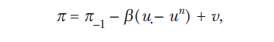

Donde:

*   π -> Inflación actual
*   π-1 -> Inflación año pasado
*   β -> Sensibilidad de la inflación a la brecha de desempleo (una constante positiva).
* u -> Tasa de desempleo actual
* u^n -> Tasa de desempleo natural (NAIRU)
* v -> Choque exógeno


Adicionalmente, podemos ser más específicos en los choques que suceden en esta economía, como lo pueden ser **choques de oferta** (cambio exógeno de ciertos precios relativos
y de producción) y **choques de demanda** (alteraciones en la demanda agregada de la economía). Estos choques pueden ir en distintas direcciones y magnitudes, según el contexto en un momento determinado de la economía. (Parra et al., 2016)

In [91]:
import random # importamos el modulo random para integrarle a nuestro modelo numeros aleatorios para hacer simulaciones.
class curvaphillips2:
    def __init__(self, inflacion_esperada, nairu,beta,choque_s = 0,choque_d = 0): # Hacemos lo mismo que en el modelo pasado, pero agregamos los atributos de oferta y de demanda que van a ser igual a 0
      self.inflacion_esperada = inflacion_esperada # De igual manera definimos todos los atributos
      self.nairu = nairu
      self.beta = beta
      self.inflacion_pasada = inflacion_esperada
      self.choque_s = choque_s
      self.choque_d = choque_d
    def valores_aleatorios(self): # Definimos los valores aleatorios para que nos de unos valores al azar de los choques.
      self.choque_d = random.uniform(-1,1) # Esta función genera choques aleatorios para oferta y demanda, usando valores en el rango de -1 a 1.
      self.choque_s = random.uniform(-1,1)
      return self.choque_s, self.choque_d
    def nuevas_expectativas(self):
      self.inflacion_esperada = self.inflacion_pasada # En esta parte usaremos el metodo nuevas_expectativas para definir la inflación esperada como la inflación que ya pasó
    def calculo_inflacion(self, desempleo):
      if desempleo < 0:
            raise ValueError("La tasa de desempleo no puede ser negativa.")
      inflacion = self.inflacion_esperada - self.beta * (desempleo - self.nairu) + (self.choque_s + self.choque_d) # Nuevamente se vuelve a definir la ecuación o el calculo que se nos otorgue para la curva
      self.inflacion_pasada = inflacion
      if inflacion < -20: # Para estar seguros que los valores de los atributos sean consistentes.
            print("Advertencia: La inflación calculada es muy baja, revisa los parámetros.")
      return inflacion
    def valores_grafica2(self, valores_desempleo2): # Repetimos los pasos del modelo anterior y definimos el metodo de valores_grafica2 con el atributo de los valores de desempleo
      valores_inflacion2 = []
      shocks = []
      for tasa in valores_desempleo2: # Igual que en el anterior modelo usamos un bucle en el cual por cada tasa (desempleo) de los valores que esten dentro de la caja de valores_desempleo2 nos de una inflación
        choques = self.valores_aleatorios() # Definimos los choques llamando el metodo de valores_aleatorios para que me de los valores de los choques de forma aleatoria
        shocks.append(choques)
        inflacion = self.calculo_inflacion(desempleo = tasa)
        valores_inflacion2.append(inflacion)
        self.nuevas_expectativas()
      return valores_inflacion2 , shocks

In [121]:
curva2 = curvaphillips2(inflacion_esperada = 4.2,nairu = 4,beta = 0.4)  # Definimos la curva2 como la curva de phillips con los valores de inflación esperada, la nairu y el beta
inflacion2 = curva2.calculo_inflacion(desempleo = 5)
print(f"La inflación calculada es de: {inflacion2: .2f}%.")

La inflación calculada es de:  3.80%.


In [126]:
curva2.nuevas_expectativas() # en los siguientes pasos nos va a mostrar la inflación con expectativas calculadas llamando el metodo de calculo de la inflación.
inflacion2_1 = curva2.calculo_inflacion(desempleo =2)
print(f"La inflación con expectativas calculada es de: {inflacion2_1: .2f}%.")

La inflación con expectativas calculada es de:  5.09%.


Ahora bien, con el objetivo de ver el modelo graficamente, se deben tomar distintos valores de desempleo en el tiempo con los cuales podamos ver los valores que toma la inflación y, asi, la dinámica entre ambas variables en una economía hipotética. Adicionalmente, se toman valores aleatorios para las perturbaciones (choques exógenos) con el fin de dinamizar el modelo, puesto que, en la realidad, la relación desempleo - inflación no siempre se cumple.

In [127]:
valores_desempleo2 = [2.5,3.0,3.5,4.0,4.5,5.0] # Llenamos la caja de los valores de desempleo.
inflaciones2 , shocks = curva2.valores_grafica2(valores_desempleo2)
print(f"Los choques exógenos de oferta y demanda, respectivamente, son de: {shocks}.")
print(f"Los valores de inflación calculados (%) son: {inflaciones2}.")

Los choques exógenos de oferta y demanda, respectivamente, son de: [(0.40000665093898125, 0.3579994116447687), (-0.14954078036904028, -0.03199143978686614), (-0.9739163520345353, 0.25554285571761626), (-0.023304861231698393, 0.07277406082442361), (-0.6274678865439398, 0.6984757806929853), (-0.0650766444556985, 0.44820629348601515)].
Los valores de inflación calculados (%) son: [5.430410379799568, 5.648878159643662, 5.130504663326743, 5.179973862919468, 5.050981757068513, 5.0341114060988295].


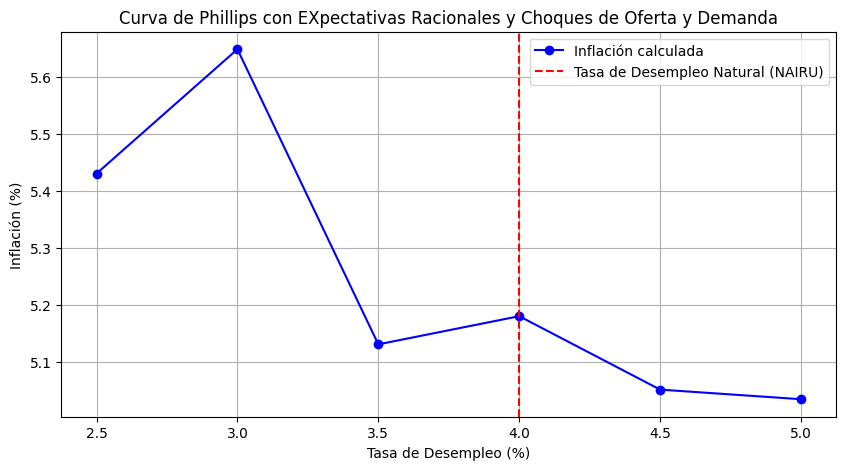

In [128]:
import matplotlib.pyplot as plt # Realizamos la gráfica respectiva para ver la dinámica del modelo con los distintos choques.
plt.figure(figsize=(10, 5))
plt.plot(valores_desempleo2,inflaciones2, marker='o', linestyle='-', color='b', label='Inflación calculada')
plt.axvline(curva2.nairu, color='r', linestyle='--', label='Tasa de Desempleo Natural (NAIRU)')
plt.xlabel('Tasa de Desempleo (%)')
plt.ylabel('Inflación (%)')
plt.title('Curva de Phillips con EXpectativas Racionales y Choques de Oferta y Demanda')
plt.legend()
plt.grid(True)
plt.show()

**Bibiliografía**
- Mankiw, G. (2008). Macroeconomía (5.a ed.).
- Parra, D., Escobar, M., & Rojas, C. D. (2016). Recuadro 1: Choques de oferta y su impacto en la actividad económica | Banco de la República. https://www.banrep.gov.co/es/recuadro-1-choques-oferta-y-su-impacto-actividad-economica